Which Chocolate Bar is the Best? Looking at Rated Dark Chocolate Bars

### Problem Statement
* Where are the best cocoa beans grown based on the highest-rated chocolate bars? 
Which countries produce the highest-rated or lowest-rated bars? 
Is there a relationship between cocoa solids percentage and bar rating?
We wanted to answer these questions from our dataset, containing chocolate manufacturer, company location, bean origin, ingredients, characteristics, and rating

    

### Challenges
    
* **Data Size:** The size of our data is relatively small, therefore the results might be skewed or results not as expected.

### Data Collection
* Source(url): https://www.kaggle.com/rtatman/chocolate-bar-ratings and http://flavorsofcacao.com/chocolate_database.html

* Short Description : Where are the best cocoa beans grown? Which countries produce the highest-rated bars? What’s the relationship between cocoa solids percentage and rating? We aim to answer these questions using the database that provides chocolate company location, bean origin, ingredients, characteristics, and rating. 

* Keywords: Chocolate, Cocoa Beans, Dark chocolate, Ingredients

### Required packages

* Add instructions to install the required packages
* make sure that all import statment have already their install packages
* pip install package_name

In [1]:
import pandas as pd
df = pd.read_csv("D:\Documents\Books\Data Mining\Project\Chocolate Data.csv")

### Data Preprocessing

* Enumerate and present the main steps you preformed in the data preprocessing
*	Apply descriptive statistics: means, std, min, max, range, info, shape
*	Preprocess features: Type conversions - We have converted the cocoa percentage column from percentage(number) to float type.
*	Detect any inconsistency/ missing values in the data (Columns Ingredients and Num of Igredients have missing values, have been imputed by **the most frequently occuring itemset found by Apriori algorithm** and mean value respectively.
*	There is no inconsistency in the data.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   REF                  2362 non-null   int64  
 1   Company              2362 non-null   object 
 2   CompanyLocation      2362 non-null   object 
 3   ReviewDate           2362 non-null   int64  
 4   CountryofBeanOrigin  2362 non-null   object 
 5   BarName              2362 non-null   object 
 6   CocoaPercent         2362 non-null   object 
 7   NumoffIngredients    2274 non-null   float64
 8   Ingredients          2274 non-null   object 
 9   Rating               2362 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 184.7+ KB


In [6]:
df.shape

(2362, 10)

In [7]:
df.head()

,REF,Company,CompanyLocation,ReviewDate,CountryofBeanOrigin,BarName,CocoaPercent,NumoffIngredients,Ingredients,Rating
0,1113,Hotel Chocolat (Coppeneur),U.K.,2013,Ecuador,"Los Rios, H. Iara, 2012, 120hr c., batch 13092",100%,1.0,B,2.50
1,1185,C-Amaro,Italy,2013,Ecuador,Ecuador,100%,1.0,B,3.50
2,1502,Sirene,Canada,2015,Madagascar,"Somia Plantation, 2012",100%,1.0,B,3.00
3,1506,Sirene,Canada,2015,Ecuador,"Camino Verde P., Balao, Guayas, 2012",100%,1.0,B,3.00
4,1760,Ocho,New Zealand,2016,Samoa,Sang Yum Coop,100%,1.0,B,2.75


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
print(df.keys())

Index(['REF', 'Company', 'CompanyLocation', 'ReviewDate',
       'CountryofBeanOrigin', 'BarName', 'CocoaPercent', 'NumoffIngredients',
       'Ingredients', 'Rating'],
      dtype='object')


In [10]:
import numpy as np
meanRating = df['Rating'].mean()
StdevRating = df['Rating'].std()

In [11]:
print('Mean of Rating is', meanRating)
print('Stdev of Rating is', StdevRating)

Mean of Rating is 3.1873835732430145
Stdev of Rating is 0.4502924036977391


In [12]:
MeanNumOfIngredients = df['NumoffIngredients'].mean()
StdevNumOfIngredients = df['NumoffIngredients'].std()

In [13]:
print('Mean of Number of Ingredients is', MeanNumOfIngredients)
print('Stdev of Number of Ingredients is', StdevNumOfIngredients)

Mean of Number of Ingredients is 3.063764291996482
Stdev of Number of Ingredients is 0.9280670671631758


In [14]:
minRating = min(df.Rating)
maxRating = max(df.Rating)

In [18]:
print("Min Rating: ",minRating, "\nMax Rating: ", maxRating)

Min Rating:  1.0 
Max Rating:  4.0


In [21]:
df['CocoaPercent'] = df['CocoaPercent'].str.rstrip('%').astype('float') / 100.0

0       1.00
1       1.00
2       1.00
3       1.00
4       1.00
        ... 
2357    0.66
2358    0.70
2359    0.65
2360    0.65
2361    0.72
Name: CocoaPercent, Length: 2362, dtype: float64

In [23]:
meancoco = df['CocoaPercent'].mean()
print('Mean of coco percentage is', meancoco*100)
minCoco = min(df.CocoaPercent)
maxCoco = max(df.CocoaPercent)
print('Min Cocoa Percentage is ',minCoco*100)
print('Max Cocoa Percentage is ',maxCoco*100)

Mean of coco percentage is 71.62679932260944
Min Cocoa Percentage is  42.0
Max Cocoa Percentage is  100.0


In [24]:
df.describe()

,REF,ReviewDate,CocoaPercent,NumoffIngredients,Rating
count,2362.000000,2362.000000,2362.000000,2274.000000,2362.000000
mean,1343.279848,2013.894581,0.716268,3.063764,3.187384
std,709.468334,3.667615,0.057161,0.928067,0.450292
min,5.000000,2006.000000,0.420000,1.000000,1.000000
25%,754.000000,2011.000000,0.700000,2.000000,3.000000
50%,1377.000000,2014.000000,0.700000,3.000000,3.250000
75%,1948.000000,2017.000000,0.740000,4.000000,3.500000
max,2542.000000,2021.000000,1.000000,6.000000,4.000000


In [25]:
minNumofIngredients = min(df.NumoffIngredients)
maxNumofIngredients = max(df.NumoffIngredients)
print('Min Number of Ingredients', minNumofIngredients)
print('Max Number of Ingredients', maxNumofIngredients)

Min Number of Ingredients 1.0
Max Number of Ingredients 6.0


In [26]:
df['NumoffIngredients']=df['NumoffIngredients'].fillna(round(MeanNumOfIngredients))
df['NumoffIngredients'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: NumoffIngredients, dtype: float64

In [28]:
sel_cols = df[['Ingredients']]
apr_df = sel_cols.copy()
apr_df

,Ingredients
0,B
1,B
2,B
3,B
4,B
...,...
2357,NaN
2358,NaN
2359,NaN
2360,NaN


In [36]:
from apyori import apriori
apr_df['Ingredients'] = apr_df['Ingredients'].str.strip('*')
records = []
for i in range(0,2274):
    records.append([str(apr_df.values[i])])
    


In [38]:
association_rules = apriori(records, min_support=0.3, min_confidence=0.35, min_length=3)
results = list(association_rules)

In [40]:
print(len(results))

1


In [43]:
print(results[0])

RelationRecord(items=frozenset({"[' B,S,C']"}), support=0.3970976253298153, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"[' B,S,C']"}), confidence=0.3970976253298153, lift=1.0)])


In [47]:
### Filling the missing values of the column Ingredient by the most frequently occuring itemset

In [42]:
df['Ingredients']=df['Ingredients'].fillna('B,S,C')

In [50]:
##Plotting the values: Cocoa % and Rating; and Number of Ingridients and Rating; to look for any natural clusters or patterns

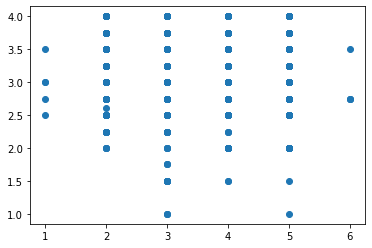

In [58]:
from matplotlib import pyplot as plt
X = df['NumoffIngredients']
Y = df['Rating']
Z = df['CocoaPercent']   
plt.scatter(X,Y)

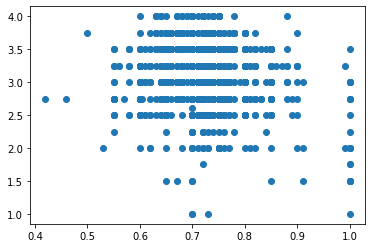

In [59]:
plt.scatter(Z,Y)

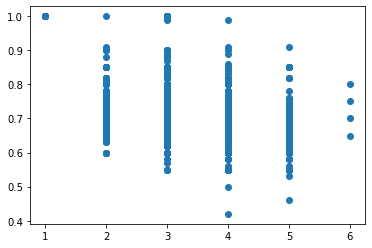

In [61]:
plt.scatter(X,Z)

In [65]:
## Top 10 rated companies producing highest rated chocolate bars
company_df = df[['Company','Rating']]

company_df.groupby(['Company']).mean().sort_values(by=(['Rating']),ascending=False)[:10]

,Rating
Company,
Tobago Estate (Pralus),4.000000
Heirloom Cacao Preservation (Zokoko),3.875000
Ocelot,3.875000
Matale,3.812500
Patric,3.791667
Idilio (Felchlin),3.775000
Chocola'te,3.750000
Landmark (Amano),3.750000
Un Dimanche A Paris,3.750000


In [67]:
## Top 10 rated company location
rating_location_df = df[["CompanyLocation","Rating"]]

rating_location_df.groupby(['CompanyLocation']).mean().sort_values(by=(["Rating"]),ascending=False)[:10]

,Rating
CompanyLocation,
Chile,3.750000
U.A.E.,3.400000
Poland,3.375000
Australia,3.358491
Guatemala,3.350000
Denmark,3.338710
Norway,3.333333
Vietnam,3.333333
Scotland,3.325000


In [72]:
## Top 10 rated Cocoa Beans Origin
cocoa_df = df[['CountryofBeanOrigin','Rating']]
cocoa_df.groupby(['CountryofBeanOrigin']).mean().sort_values(by=(['Rating']),ascending=False)[:10]

,Rating
CountryofBeanOrigin,
Tobago,3.625000
Sao Tome & Principe,3.500000
Solomon Islands,3.450000
Congo,3.318182
Thailand,3.300000
Cuba,3.291667
Guatemala,3.280702
Haiti,3.278846
Papua New Guinea,3.275510


In [81]:
ingredients_df = df[["NumoffIngredients","Rating"]]
ingredients_df.groupby(['NumoffIngredients']).mean().sort_values(by=(["Rating"]),ascending=False)

,Rating
NumoffIngredients,
3.0,3.226601
2.0,3.208297
4.0,3.117841
5.0,3.079843
1.0,2.950000
6.0,2.937500


### Methodology

1. We will be doing cluster analysis on the the data to try and find any correlation between Cocoa percentage and Rating; and Number of Ingredients and Rating.


2. Introduce the data mining model you used in your project
 * Clustering using K-means: 
     The optimal value for Kmeans clustering has been found from Elbow method. 
 
3. Add keywords  
**Keywords:** K-means

In [99]:
from matplotlib import pyplot as plt
import seaborn  as sns, pandas as pd
import random
random.seed(1000,2000)

In [105]:
cluster_df = pd.DataFrame({'CocoPercent':Z, 'Rating':Y})

In [107]:
cluster_df

,CocoPercent,Rating
0,1.00,2.50
1,1.00,3.50
2,1.00,3.00
3,1.00,3.00
4,1.00,2.75
...,...,...
2357,0.66,3.50
2358,0.70,3.50
2359,0.65,2.50
2360,0.65,2.75


In [108]:
from sklearn.cluster import KMeans
k=3
kmeans=KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(cluster_df)

In [109]:
y_pred

array([2, 0, 1, ..., 2, 2, 2])

In [110]:
y_pred is kmeans.labels_

True

In [112]:
kmeans.cluster_centers_

array([[0.71077009, 3.63616071],
       [0.71531012, 3.11452666],
       [0.726883  , 2.57468007]])

In [113]:
kmeans.labels_

array([2, 0, 1, ..., 2, 2, 2])

In [114]:
kmeans.inertia_

95.66854673294694

In [115]:
X_dist = kmeans.transform(cluster_df)

np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

95.6685467329477

In [116]:
kmeans.score(cluster_df)

-95.66854673294691

In [117]:
from sklearn.metrics import silhouette_score

In [118]:
silhouette_score(cluster_df, kmeans.labels_)

0.5864064559836455

In [119]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(cluster_df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

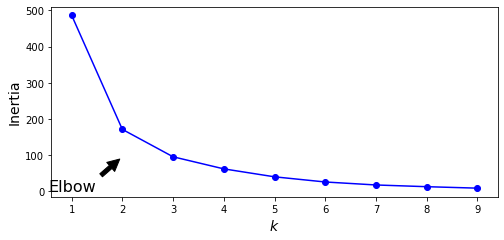

In [120]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[2]),
             xytext=(0.55, 0.55),
             #textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.show()

In [121]:
##We can see from elbow method that optimal number of clusters is 3

In [125]:
from scipy.cluster.vq import kmeans, vq
centroids, _ = kmeans(cluster_df, 3)
cluster_df['cluster_labels'], _ = vq(cluster_df,centroids)
cluster_df

,CocoPercent,Rating,cluster_labels
0,1.00,2.50,2
1,1.00,3.50,0
2,1.00,3.00,1
3,1.00,3.00,1
4,1.00,2.75,2
...,...,...,...
2357,0.66,3.50,0
2358,0.70,3.50,0
2359,0.65,2.50,2
2360,0.65,2.75,2


<AxesSubplot:xlabel='CocoPercent', ylabel='Rating'>

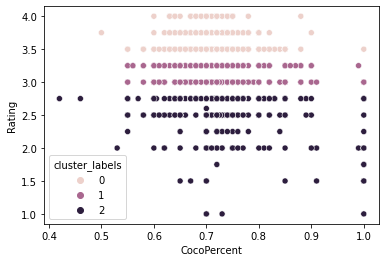

In [126]:
sns.scatterplot(x='CocoPercent', y='Rating', hue='cluster_labels', data=cluster_df)

In [127]:
cluster_df2 = pd.DataFrame({'NumOfIngredients':X, 'Rating':Y})

In [128]:
cluster_df2

,NumOfIngredients,Rating
0,1.0,2.50
1,1.0,3.50
2,1.0,3.00
3,1.0,3.00
4,1.0,2.75
...,...,...
2357,3.0,3.50
2358,3.0,3.50
2359,3.0,2.50
2360,3.0,2.75


In [130]:
from sklearn.cluster import KMeans
k=3
kmeans=KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(cluster_df2)

In [131]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [132]:
y_pred is kmeans.labels_

True

In [133]:
kmeans.cluster_centers_

array([[3.        , 3.22660099],
       [1.99283668, 3.20644699],
       [4.30662558, 3.105547  ]])

In [134]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [135]:
kmeans.inertia_

623.5084861508312

In [136]:
X_dist = kmeans.transform(cluster_df2)

np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

623.508486150838

In [137]:
kmeans.score(cluster_df2)

-623.5084861508312

In [139]:
from sklearn.metrics import silhouette_score

In [140]:
silhouette_score(cluster_df2, kmeans.labels_)

0.5493674101496581

In [141]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(cluster_df2)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

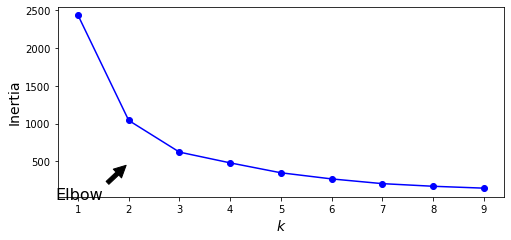

In [143]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[3]),
             xytext=(0.55, 0.55),
             #textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.show()

In [145]:
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn  as sns, pandas as pd
import random
random.seed(1000,2000)

centroids, _ = kmeans(cluster_df2, 3)
cluster_df2['cluster_labels'], _ = vq(cluster_df2,centroids)

In [146]:
cluster_df2

,NumOfIngredients,Rating,cluster_labels
0,1.0,2.50,1
1,1.0,3.50,1
2,1.0,3.00,1
3,1.0,3.00,1
4,1.0,2.75,1
...,...,...,...
2357,3.0,3.50,2
2358,3.0,3.50,2
2359,3.0,2.50,2
2360,3.0,2.75,2


<AxesSubplot:xlabel='NumOfIngredients', ylabel='Rating'>

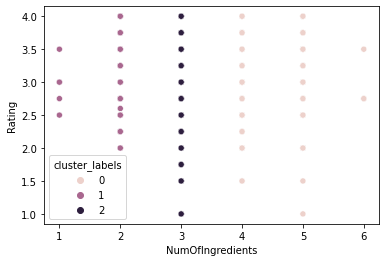

In [148]:
sns.scatterplot(x='CocoPercent', y='Rating', hue='cluster_labels', data=cluster_df2)

###  Evaluation of Results

From the cluter analysis we see that we did not find the results as expected.
We assumed to find a correlation between cocoa percantage and rating; and number of ingridients and rating.


### Issues / Improvements

1. Dataset is very small
2. There are multiple libraries to use to do one type of clustering, choosing which one to do is difficult.